In [1]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split,GridSearchCV
from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D
from sklearn.metrics import classification_report,accuracy_score
from keras.wrappers.scikit_learn import KerasClassifier
from keras.constraints import maxnorm

Using TensorFlow backend.


In [2]:
age_data = np.load('numpy_files/age_data.npz')

In [3]:
X = age_data['X']
y = age_data['y']

In [4]:
X.shape

(23709, 50, 50, 3)

In [5]:
y.shape

(23709,)

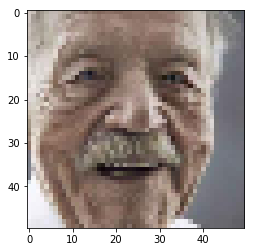

In [6]:
plt.imshow(X[0])

In [4]:
# Normalise the data
X = X/255
y = to_categorical(y,6)

In [8]:
# Split data to small size for parameter testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=42)

In [9]:
X_test.shape

(1186, 50, 50, 3)

In [10]:
# Select data for validation
X_val = X_test[1000:]
y_val = y_test[1000:]

X_test = X_test[:1000]
y_test = y_test[:1000]

In [11]:
X_val.shape

(186, 50, 50, 3)

In [12]:
y_val.shape

(186, 6)

In [31]:
def create_model():
    model = Sequential()

    model.add(Conv2D(filters=32, kernel_size=2,input_shape=(50,50,3), activation='relu',))
    model.add(MaxPooling2D(pool_size=2))

    model.add(Conv2D(filters=64, kernel_size=2,input_shape=(50,50,3), activation='relu',))
    model.add(MaxPooling2D(pool_size=2))

    model.add(Conv2D(filters=64, kernel_size=2,input_shape=(50,50,3), activation='relu',))
    model.add(MaxPooling2D(pool_size=2))

    # flatten array to 50*50
    model.add(Flatten())
    model.add(Dense(256))
    model.add(Activation('relu'))
    
    # Prevent overfitting 
    model.add(Dropout(0.4))
    model.add(Dense(6))
    model.add(Activation('softmax'))

    model.compile(loss='categorical_crossentropy',
                 optimizer='adam',
                 metrics=['accuracy'])
    return model


In [ ]:
model = KerasClassifier(build_fn=create_model, verbose=0)
size =X_test.shape[0]

batch_size = [64,128,size//50,size//100]
epochs = [5,10,20,30]

param_grid = dict(batch_size=batch_size,epochs=epochs)
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3)
grid_result = grid.fit(X_train, y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

In [36]:
# Optimizer tuning
def create_model(optimizer='adam'):
    model = Sequential()

    model.add(Conv2D(filters=32, kernel_size=2,input_shape=(50,50,3), activation='relu',))
    model.add(MaxPooling2D(pool_size=2))

    model.add(Conv2D(filters=64, kernel_size=2,input_shape=(50,50,3), activation='relu',))
    model.add(MaxPooling2D(pool_size=2))

    model.add(Conv2D(filters=64, kernel_size=2,input_shape=(50,50,3), activation='relu',))
    model.add(MaxPooling2D(pool_size=2))

    # flatten array to 50*50
    model.add(Flatten())
    model.add(Dense(256))
    model.add(Activation('relu'))
    
    # Prevent overfitting 
    model.add(Dropout(0.4))
    model.add(Dense(6))
    model.add(Activation('softmax'))

    model.compile(loss='categorical_crossentropy',
                 optimizer=optimizer,
                 metrics=['accuracy'])
    return model

model = KerasClassifier(build_fn=create_model, verbose=0,epochs=10,batch_size=33)

optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']

param_grid = dict(optimizer=optimizer)
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3)
grid_result = grid.fit(X_test, y_test)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))


Best: 0.601000 using {'optimizer': 'Adam'}
0.545000 (0.026469) with: {'optimizer': 'SGD'}
0.565000 (0.010452) with: {'optimizer': 'RMSprop'}
0.588000 (0.026633) with: {'optimizer': 'Adagrad'}
0.536000 (0.064826) with: {'optimizer': 'Adadelta'}
0.601000 (0.017633) with: {'optimizer': 'Adam'}
0.567000 (0.016589) with: {'optimizer': 'Adamax'}
0.546000 (0.077257) with: {'optimizer': 'Nadam'}


In [38]:
# Optimizer tuning
def create_model(init_mode='uniform'):
    model = Sequential()

    model.add(Conv2D(filters=32, kernel_size=2,input_shape=(50,50,3), activation='relu',))
    model.add(MaxPooling2D(pool_size=2))

    model.add(Conv2D(filters=64, kernel_size=2,input_shape=(50,50,3), activation='relu',))
    model.add(MaxPooling2D(pool_size=2))

    model.add(Conv2D(filters=64, kernel_size=2,input_shape=(50,50,3), activation='relu',))
    model.add(MaxPooling2D(pool_size=2))

    # flatten array to 50*50
    model.add(Flatten())
    model.add(Dense(256,kernel_initializer=init_mode))
    model.add(Activation('relu'))
    
    # Prevent overfitting 
    model.add(Dropout(0.4))
    model.add(Dense(6,kernel_initializer=init_mode))
    model.add(Activation('softmax'))

    model.compile(loss='categorical_crossentropy',
                 optimizer='adam',
                 metrics=['accuracy'])
    return model

model = KerasClassifier(build_fn=create_model, verbose=0,epochs=5,batch_size=33)

init_mode = ['uniform', 'lecun_uniform', 'normal', 'zero', 'glorot_normal', 'glorot_uniform', 'he_normal', 'he_uniform']
param_grid = dict(init_mode=init_mode)
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3)
grid_result = grid.fit(X_test, y_test)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))


Best: 0.554000 using {'init_mode': 'glorot_uniform'}
0.545000 (0.026469) with: {'init_mode': 'uniform'}
0.545000 (0.026469) with: {'init_mode': 'lecun_uniform'}
0.546000 (0.027610) with: {'init_mode': 'normal'}
0.545000 (0.026469) with: {'init_mode': 'zero'}
0.547000 (0.026331) with: {'init_mode': 'glorot_normal'}
0.554000 (0.015558) with: {'init_mode': 'glorot_uniform'}
0.548000 (0.022621) with: {'init_mode': 'he_normal'}
0.546000 (0.027610) with: {'init_mode': 'he_uniform'}


In [40]:
# Optimizer tuning
def create_model(activation='relu'):
    model = Sequential()

    model.add(Conv2D(filters=32, kernel_size=2,input_shape=(50,50,3), activation=activation,))
    model.add(MaxPooling2D(pool_size=2))

    model.add(Conv2D(filters=64, kernel_size=2,input_shape=(50,50,3), activation=activation,))
    model.add(MaxPooling2D(pool_size=2))

    model.add(Conv2D(filters=64, kernel_size=2,input_shape=(50,50,3), activation=activation,))
    model.add(MaxPooling2D(pool_size=2))

    # flatten array to 50*50
    model.add(Flatten())
    model.add(Dense(256))
    model.add(Activation(activation))
    
    # Prevent overfitting 
    model.add(Dropout(0.4))
    model.add(Dense(6))
    model.add(Activation('softmax'))

    model.compile(loss='categorical_crossentropy',
                 optimizer='adam',
                 metrics=['accuracy'])
    return model

model = KerasClassifier(build_fn=create_model, verbose=0,epochs=5,batch_size=33)

activation = ['softmax', 'softplus', 'softsign', 'relu', 'tanh', 'sigmoid', 'hard_sigmoid', 'linear']
param_grid = dict(activation=activation)
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3)
grid_result = grid.fit(X_test, y_test)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.617000 using {'activation': 'linear'}
0.545000 (0.026469) with: {'activation': 'softmax'}
0.545000 (0.026469) with: {'activation': 'softplus'}
0.615000 (0.028713) with: {'activation': 'softsign'}
0.545000 (0.026469) with: {'activation': 'relu'}
0.611000 (0.035865) with: {'activation': 'tanh'}
0.545000 (0.026469) with: {'activation': 'sigmoid'}
0.545000 (0.026469) with: {'activation': 'hard_sigmoid'}
0.617000 (0.038886) with: {'activation': 'linear'}


In [ ]:
# Optimizer tuning
def create_model(dropout_rate=0.0, weight_constraint=0):
    model = Sequential()

    model.add(Conv2D(filters=32, kernel_size=2,input_shape=(50,50,3), activation='relu'))
    model.add(MaxPooling2D(pool_size=2))

    model.add(Conv2D(filters=64, kernel_size=2,input_shape=(50,50,3), activation='relu'))
    model.add(MaxPooling2D(pool_size=2))

    model.add(Conv2D(filters=64, kernel_size=2,input_shape=(50,50,3), activation='relu'))
    model.add(MaxPooling2D(pool_size=2))

    # flatten array to 50*50
    model.add(Flatten())
    model.add(Dense(256,kernel_constraint=maxnorm(weight_constraint)))
    model.add(Activation('relu'))
    
    # Prevent overfitting 
    model.add(Dropout(dropout_rate))
    model.add(Dense(6))
    model.add(Activation('softmax'))

    model.compile(loss='categorical_crossentropy',
                 optimizer='adam',
                 metrics=['accuracy'])
    return model

model = KerasClassifier(build_fn=create_model, verbose=0,epochs=5,batch_size=33)
weight_constraint = [1, 2, 3, 4, 5]
dropout_rate = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
param_grid = dict(dropout_rate=dropout_rate, weight_constraint=weight_constraint)
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3)
grid_result = grid.fit(X_test, y_test)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

In [13]:
# Optimizer tuning
def create_model(kernel_size=2):
    model = Sequential()

    model.add(Conv2D(filters=32, kernel_size=kernel_size,input_shape=(50,50,3), activation='relu'))
    model.add(MaxPooling2D(pool_size=2))

    model.add(Conv2D(filters=64, kernel_size=kernel_size,input_shape=(50,50,3), activation='relu'))
    model.add(MaxPooling2D(pool_size=2))

    model.add(Conv2D(filters=64, kernel_size=kernel_size,input_shape=(50,50,3), activation='relu'))
    model.add(MaxPooling2D(pool_size=2))

    # flatten array to 50*50
    model.add(Flatten())
    model.add(Dense(256))
    model.add(Activation('relu'))
    
    # Prevent overfitting 
    model.add(Dropout(0.4))
    model.add(Dense(6))
    model.add(Activation('softmax'))

    model.compile(loss='categorical_crossentropy',
                 optimizer='adam',
                 metrics=['accuracy'])
    return model

model = KerasClassifier(build_fn=create_model, verbose=0,epochs=5,batch_size=33)
kernel_size = [1, 2, 3, 4, 5]
param_grid = dict(kernel_size=kernel_size)
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3)
grid_result = grid.fit(X_test, y_test)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.549000 using {'kernel_size': 1}
0.549000 (0.031166) with: {'kernel_size': 1}
0.549000 (0.029090) with: {'kernel_size': 2}
0.547000 (0.023889) with: {'kernel_size': 3}
0.545000 (0.026469) with: {'kernel_size': 4}
0.545000 (0.026469) with: {'kernel_size': 5}


In [ ]:
Best: 0.629000 using {'batch_size': 33, 'epochs': 20}
Best: 0.601000 using {'optimizer': 'Adam'}
Best: 0.554000 using {'init_mode': 'glorot_uniform'}
Best: 0.617000 using {'activation': 'linear'}
Best: 0.549000 using {'kernel_size': 1}

In [28]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=1,input_shape=(50,50,3), activation='linear'))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters=64, kernel_size=1,input_shape=(50,50,3), activation='linear'))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters=64, kernel_size=1,input_shape=(50,50,3), activation='linear'))
model.add(MaxPooling2D(pool_size=2))

# flatten array to 50*50
model.add(Flatten())
model.add(Dense(256,kernel_initializer='glorot_uniform'))
model.add(Activation('linear'))

# Prevent overfitting 
model.add(Dropout(0.4))
model.add(Dense(6,kernel_initializer='glorot_uniform'))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              
             optimizer='adam',
             metrics=['accuracy'])

In [5]:
# Split data to small size for parameter testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [23]:
X_train.shape

(16596, 50, 50, 3)

In [6]:
# Select data for validation
X_valid = X_test[1600:]
y_valid = y_test[1600:]

X_test = X_test[:1600]
y_test = y_test[:1600]

In [8]:
np.savez_compressed('numpy_files/age_test.npz',X_test=X_test,y_test=y_test,X_val=X_valid,y_val=y_valid)

In [9]:
np.savez_compressed('numpy_files/age_train.npz',X=X_train,y=y_train)

In [29]:
model.fit(X_train,
         y_train,
         batch_size=33,
         epochs=20,
         validation_data=(X_valid, y_valid))

Train on 16596 samples, validate on 5513 samples
Epoch 1/20
16596/16596 [==============================] - 14s 854us/step - loss: 1.0519 - acc: 0.6033 - val_loss: 0.8645 - val_acc: 0.6746
Epoch 2/20
16596/16596 [==============================] - 13s 784us/step - loss: 0.8705 - acc: 0.6691 - val_loss: 0.8149 - val_acc: 0.6949
Epoch 3/20
16596/16596 [==============================] - 13s 796us/step - loss: 0.8262 - acc: 0.6784 - val_loss: 0.7800 - val_acc: 0.7018
Epoch 4/20
16596/16596 [==============================] - 13s 798us/step - loss: 0.8007 - acc: 0.6885 - val_loss: 0.7774 - val_acc: 0.7032
Epoch 5/20
16596/16596 [==============================] - 13s 800us/step - loss: 0.7804 - acc: 0.6975 - val_loss: 0.7444 - val_acc: 0.7136
Epoch 6/20
16596/16596 [==============================] - 13s 804us/step - loss: 0.7627 - acc: 0.7030 - val_loss: 0.7495 - val_acc: 0.7109
Epoch 7/20
16596/16596 [==============================] - 13s 813us/step - loss: 0.7516 - acc: 0.7085 - val_loss: 0.7

In [30]:
y_pred = model.predict_classes(X_test)
y_cat= to_categorical(y_pred,6)
print(f"Accuracy: {accuracy_score(y_cat,y_test)}")
print(f"Classification Report: \n{classification_report(y_cat,y_test)}")

Accuracy: 0.708125
Classification Report: 
             precision    recall  f1-score   support

          0       0.81      0.81      0.81       112
          1       0.58      0.50      0.54       141
          2       0.29      0.41      0.34        51
          3       0.92      0.76      0.83      1027
          4       0.40      0.66      0.50       213
          5       0.36      0.59      0.45        56

avg / total       0.77      0.71      0.73      1600

